**Dataset:  https://www.kaggle.com/datasets/ddosad/auto-sales-data**

In [1]:
## importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading the data
df = pd.read_csv('Auto Sales data.csv')

In [3]:
##Checking 1st Five rows
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
## Information regarding datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [5]:
## Detailed information 
df[['QUANTITYORDERED','PRICEEACH','SALES','MSRP']].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000
mean,35.103021,101.098952,3553.047583,100.691664
std,9.762135,42.042549,1838.953901,40.114802
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.745000,2204.350000,68.000000
50%,35.000000,95.550000,3184.800000,99.000000
75%,43.000000,127.100000,4503.095000,124.000000
max,97.000000,252.870000,14082.800000,214.000000


In [6]:
## Checking for unique values and top value in columns with object as their datatype
df[['PRODUCTLINE','COUNTRY','DEALSIZE','STATUS','CITY']].describe()

,PRODUCTLINE,COUNTRY,DEALSIZE,STATUS,CITY
count,2747,2747,2747,2747,2747
unique,7,19,3,6,71
top,Classic Cars,USA,Medium,Shipped,Madrid
freq,949,928,1349,2541,304


In [7]:
## Checking for null values
pd.isnull(df).sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [8]:
## Shape of the data
df.shape

(2747, 20)

In [9]:
##Names of columns
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

**EXPLORATORY DATA ANALYSIS**

**Dealsize**

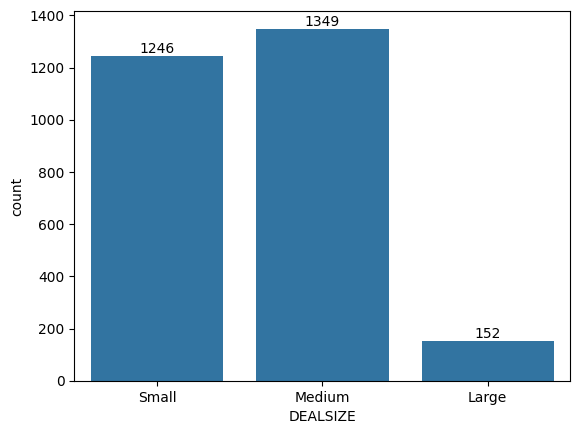

In [10]:
ds = sns.countplot(x = 'DEALSIZE', data = df)
for bars in ds.containers:
    ds.bar_label(bars)

From the above graph we got to know that **Medium Dealsize** is most popular and **Large Dealsize** is the least popular dealsize.

**PRODUCT LINE**

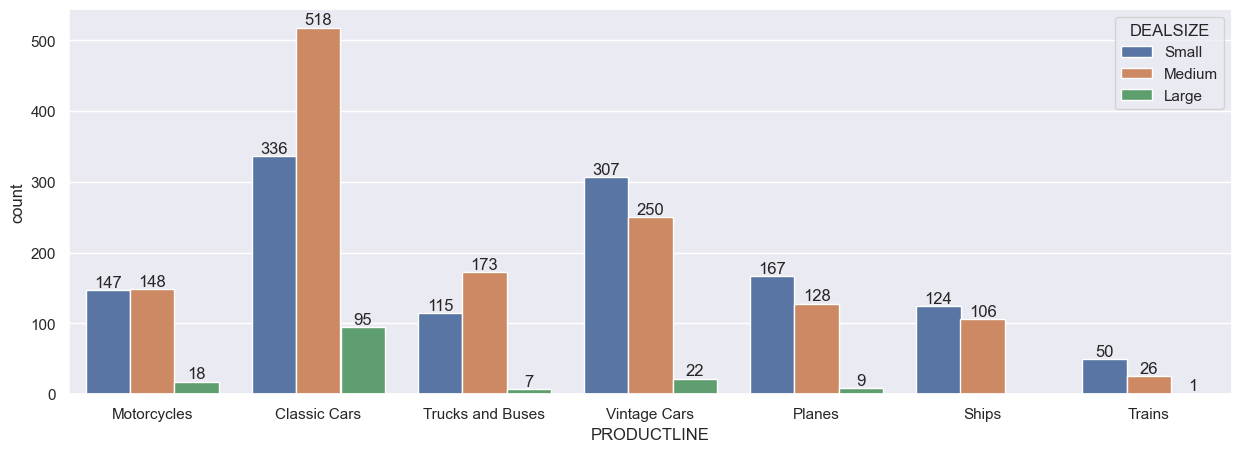

In [18]:
pl = sns.countplot(x='PRODUCTLINE',data=df,hue='DEALSIZE')
for bars in pl.containers:
    pl.bar_label(bars)

sns.set(rc={'figure.figsize':(25,15)})

From the above graph we got to know that **Classic Cars** is the most popular item in all the dealsizes and **Trains** has the lowest dealsize in small and medium dealsizes whereas **Ships** has the lowest large dealsize.

**SALES OF COUNTRIES**

In [12]:
cs=df.groupby(['COUNTRY'],as_index=False)['SALES'].sum().sort_values(by='SALES',ascending=False)

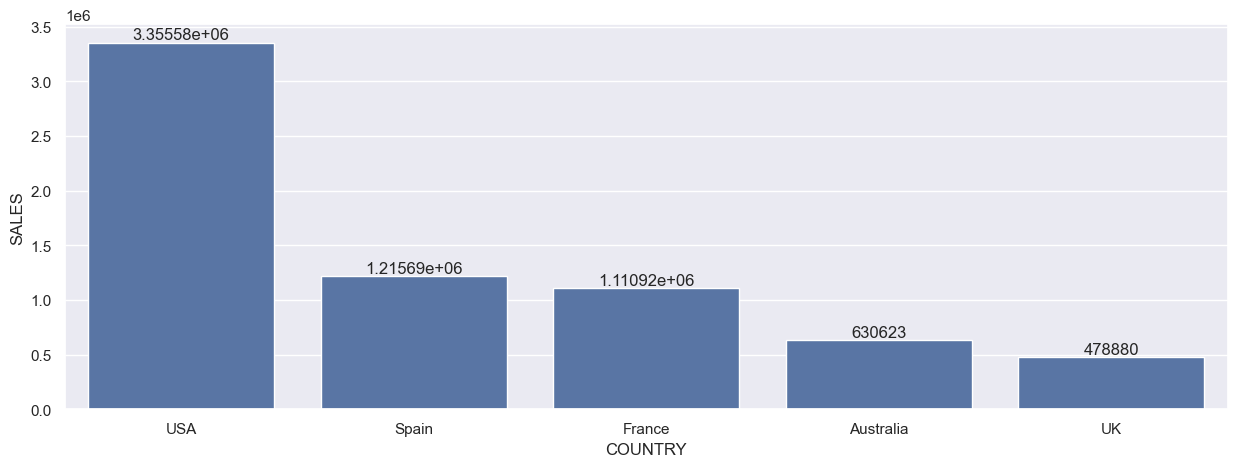

In [24]:
## Top 10 Countries in terms of Sales
sc=sns.barplot(x='COUNTRY',y='SALES',data=cs.head(5))
sns.set(rc={'figure.figsize':(15,5)})
for bars in sc.containers:
    sc.bar_label(bars)

**USA** has the maximum sales.

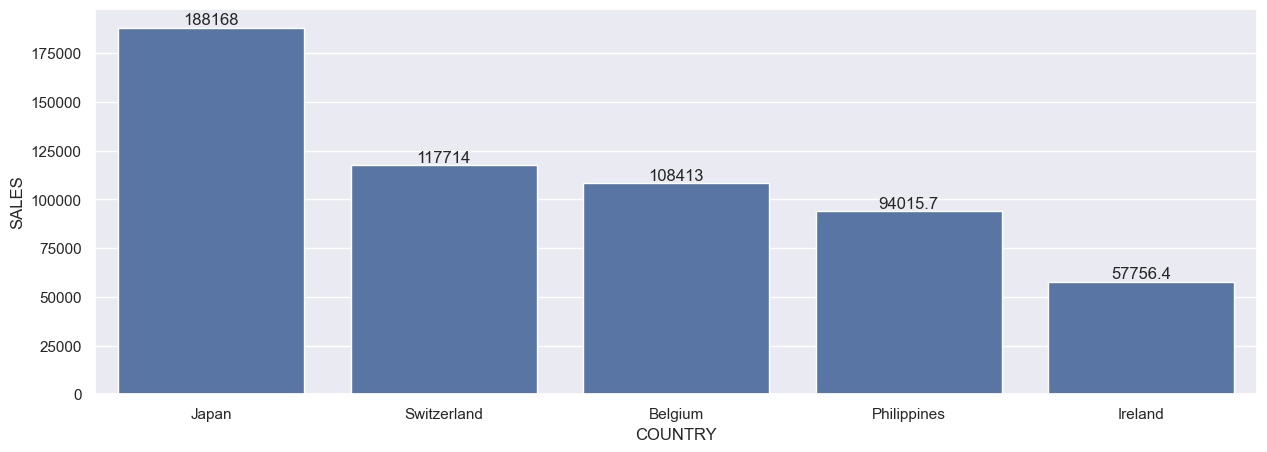

In [23]:
## Bottom 10 Countries in terms of Sales
sc=sns.barplot(x='COUNTRY',y='SALES',data=cs.tail(5))
sns.set(rc={'figure.figsize':(15,5)})
for bars in sc.containers:
    sc.bar_label(bars)

**Ireland** has the minimum sales.

**QUANTITY ORDERED OF DIFFERENT PRODUCTS**

In [16]:
pq=df.groupby(['PRODUCTLINE'],as_index=False)['QUANTITYORDERED'].sum().sort_values(by='QUANTITYORDERED',ascending=False)

<Axes: xlabel='PRODUCTLINE', ylabel='QUANTITYORDERED'>

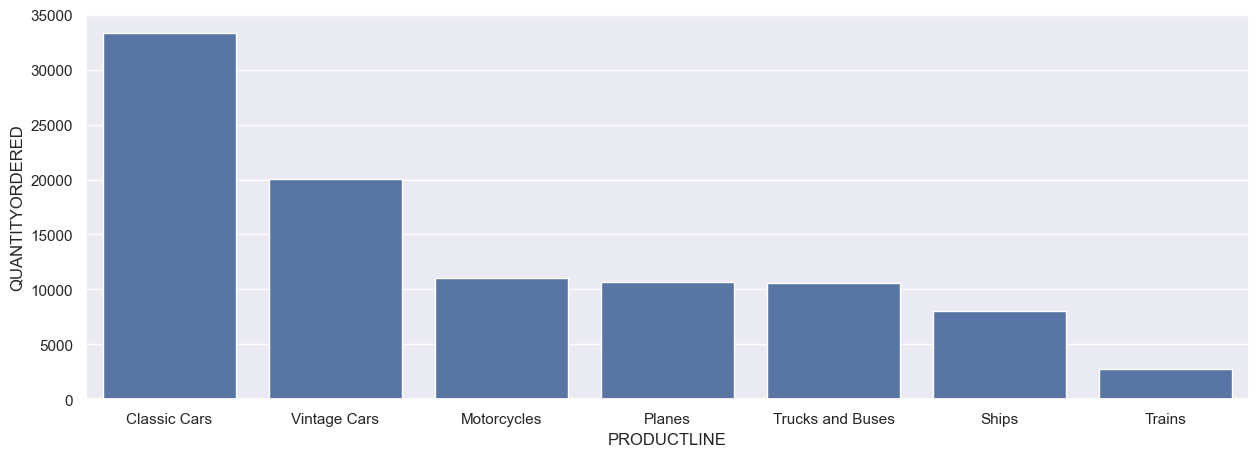

In [17]:
sns.barplot(x='PRODUCTLINE',y='QUANTITYORDERED',data=pq)

**Classic Sales** is the most popular item.